In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import tensorflow as tf
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
from statsmodels.regression.quantile_regression import QuantReg

In [24]:
sf = pickle.load(open("../data/SF.pickle", "rb"))

                         QuantReg Regression Results                          
Dep. Variable:                magdiff   Pseudo R-squared:            -0.001823
Model:                       QuantReg   Bandwidth:                     0.04129
Method:                 Least Squares   Sparsity:                        1.003
Date:                Sun, 08 Apr 2018   No. Observations:                81575
Time:                        00:52:41   Df Residuals:                    81572
                                        Df Model:                            2
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.135e-07      0.012   -1.8e-05      1.000      -0.023       0.023
I(timediff)           -0.0002   1.16e-05    -19.839      0.000      -0.000      -0.000
I(timediff ** 2.0)   5.59e-08   2.58e-09     21.634      0.000    5.08e-08     6.1e-08

The conditi

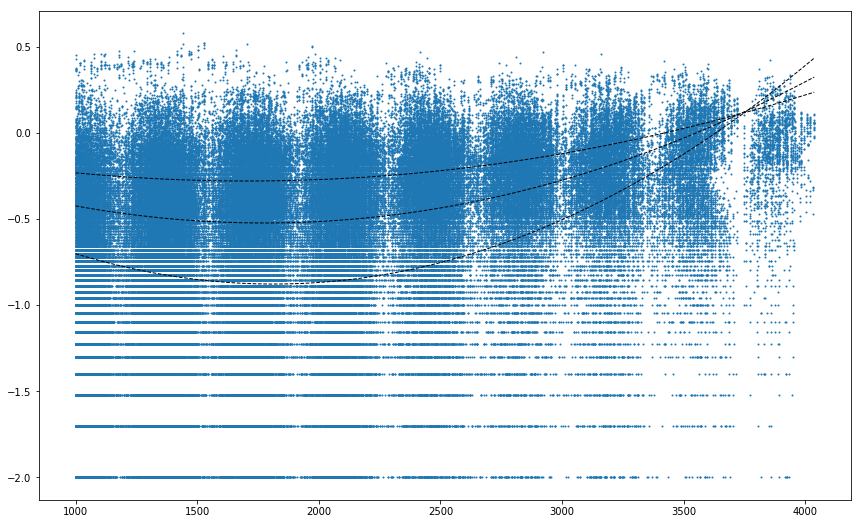

In [67]:
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['timediff']] + \
            res.conf_int().ix['timediff'].tolist()

dataset = 50
# quantiles = np.arange(.05, .96, .1)
quantiles = [0.25, 0.5, 0.75]
timediff = sf[dataset]["timediff"] + 1000.0 # - 1000.0
magdiff = sf[dataset]["magdiff"]
d = {'timediff': timediff, 'magdiff': magdiff}
data = pd.DataFrame(data=d)

formula = 'magdiff ~ I(timediff) + I(timediff ** 2.0) + 1'

mod = smf.quantreg(formula, data)
res_all = [mod.fit(q=q) for q in quantiles]
print(res.summary())

plt.figure(figsize=(9 * 1.618, 9))
x_p = np.linspace(data.timediff.min(), data.timediff.max(), 50)
df_p = pd.DataFrame({'timediff': x_p})

plt.scatter(timediff, magdiff, s=1)
for qm, res in zip(quantiles, res_all):
    plt.plot(x_p, res.predict(df_p), linestyle='--', lw=1, color='k')
    
    

In [20]:
models

[[0.05,
  -2.2113250063166825e-05,
  -0.00499950082571321,
  -0.005046190150234648,
  -0.004952811501191772],
 [0.15000000000000002,
  -1.1798077645658293e-05,
  -0.0029394267520339475,
  -0.002979557374865369,
  -0.002899296129202526],
 [0.25000000000000006,
  -6.203293094023994e-06,
  -0.0022009780442346707,
  -0.0022344013027764814,
  -0.00216755478569286],
 [0.35000000000000003,
  -5.302124124620099e-06,
  -0.001694110627469837,
  -0.001722267592825486,
  -0.0016659536621141879],
 [0.45000000000000007,
  -4.036913300004634e-06,
  -0.0014038121996779208,
  -0.0014293288253363825,
  -0.0013782955740194592],
 [0.5500000000000002,
  -3.4577538307992567e-06,
  -0.0010737191297309134,
  -0.0010954151097581106,
  -0.0010520231497037162],
 [0.6500000000000001,
  -2.2456959570595803e-06,
  -0.0007903028670039457,
  -0.0008097379157028688,
  -0.0007708678183050227],
 [0.7500000000000002,
  -1.4930632234966343e-06,
  -0.0005148792405552031,
  -0.0005332922700169254,
  -0.0004964662110934809],